# Exploratory Data Analysis

In [41]:
# 多plot, 尝试一些奇怪的东西, 看看会不会有新发现

# 好多都需要换一下数据来源，因为是别的notebook复制来的，plot之前留意一下吧
# 写的时候记得title和label，可以用vscode 左边的outline看在哪，因为最后要交这个notebook，
# 所以公证一些是好的

## Preparation

### Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns


### Import data and conduct necessary checks

In [ ]:
# load preprocessed and normalised data 
df_review = pd.read_csv("review.csv")
df_product = pd.read_csv("product.csv")
df_camera_norm = pd.read_csv("review_camera_normalised.csv") 
# use camera to write code, we might change other product category

## Review dataset EDA 

### All review dataset

In [ ]:
#  general descriptive statsitics 

In [ ]:
#  data relating to the size of the review dataset

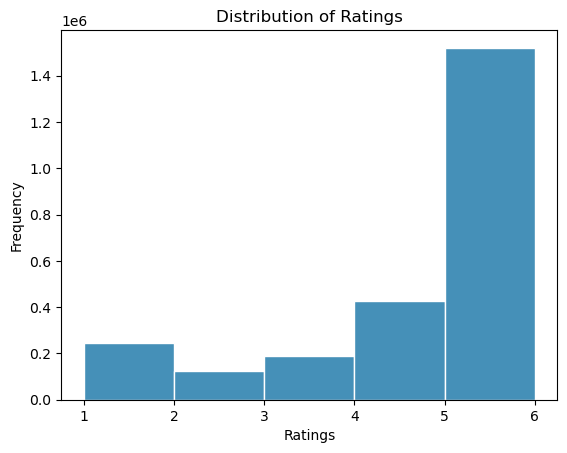

In [21]:
plt.hist(df_camera_norm['overall'], bins=range(1, 7), edgecolor='white', color= "#4590B8")
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

In [ ]:
df_review.value_counts("main_cat")

main_cat
Computers                                                                                                                                                                                         6732262
All Electronics                                                                                                                                                                                   3655780
Home Audio & Theater                                                                                                                                                                              3301869
Camera & Photo                                                                                                                                                                                    2502223
Cell Phones & Accessories                                                                                                                                                              

In [ ]:
# top 10 categoty plot 

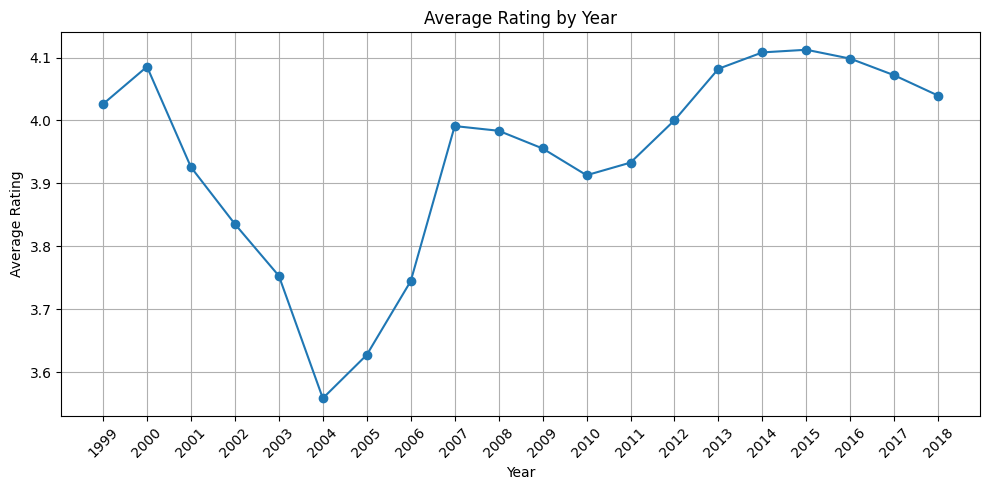

In [ ]:
df_avg_rating = df_review.groupby('Year')['overall'].mean()
df_avg_rating.drop([1997, 1998], inplace=True)
plt.figure(figsize=(10, 5))  # Optional: Adjusts the size of the figure
plt.plot(df_avg_rating.index.astype(int), df_avg_rating, marker='o')  # Ensure index is integer
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating by Year')
plt.xticks(df_avg_rating.index.astype(int), rotation=45)  # Ensure x-ticks are integer years and rotate for better visibility

plt.grid(True)  
plt.tight_layout() 
plt.show()


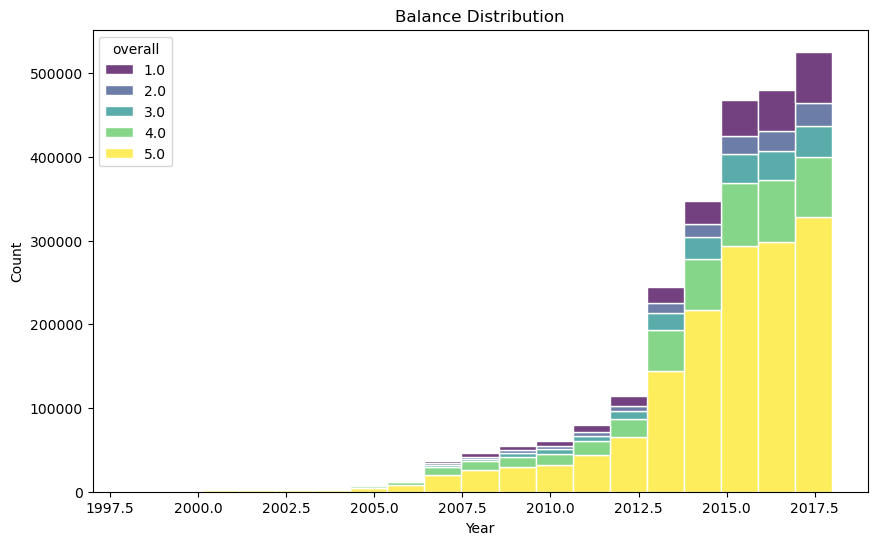

In [35]:
# to be adjusted: the color to, the x range
plt.figure(figsize=(10, 6))  
sns.histplot(
    data=df_camera_norm,
    x="Year",
    hue="overall",
    bins=19,
    palette="viridis",
    edgecolor="white",
    multiple="stack",
)
plt.title("Balance Distribution")
plt.show()


### (a specific product) review dataset

In [36]:
# general descriptive statsitics

In [ ]:
# 每一年的评论数量长度的average

In [ ]:
# 平均评论长度和平均评分

In [ ]:
# 是否有图片和vote的关系（下面有可以直接复制的代码）

In [ ]:
# 再想想还有那些有价值的图 可以问问chat之类的

# Others: 看着用，这是我之前乱搞的，说不定有些能讲出什么。用的话记得改颜色和变量名

review image and votes

In [ ]:
df_review_merged = pd.read_csv('df_review_merged.csv')
df_review_merged.info()

C:\Users\rzp98\AppData\Local\Temp\ipykernel_5760\3956128325.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_review_merged = pd.read_csv('df_review_merged.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20566364 entries, 0 to 20566363
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   overall     float64
 1   verified    bool   
 2   reviewTime  object 
 3   asin        object 
 4   reviewText  object 
 5   vote        object 
 6   image       bool   
 7   price       float64
 8   main_cat    object 
 9   Year        int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 1.3+ GB


In [ ]:

df_review_merged['vote'] = df_review_merged['vote'].str.replace(',', '').astype(float)


In [ ]:
df_review_merged['vote'].isna().sum()

0

In [ ]:
df_review_merged = df_review_merged.dropna(subset=['vote'])

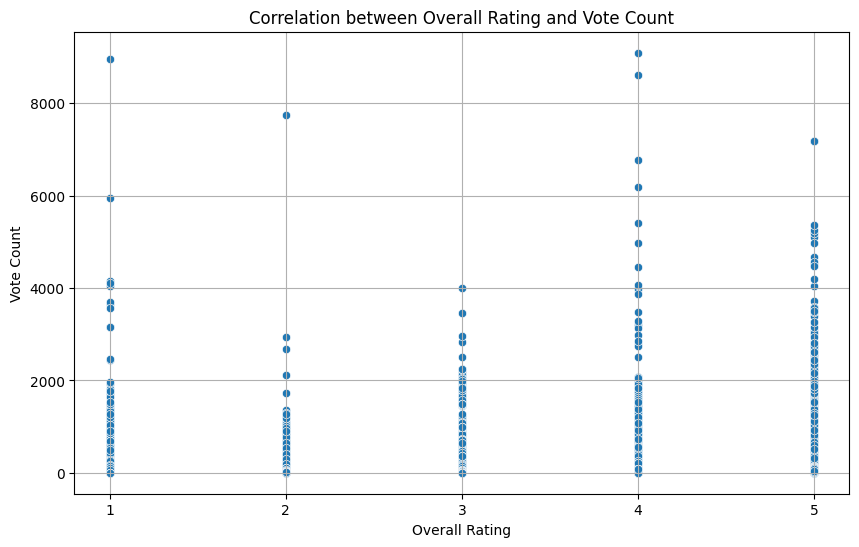

0.019782066960203546

In [ ]:
correlation = df_review_merged['overall'].corr(df_review_merged['vote'])

# Visualize the correlation
plt.figure(figsize=(10, 6))
plt.xticks([1, 2, 3, 4, 5])
sns.scatterplot(x='overall', y='vote', data=df_review_merged)
plt.title('Correlation between Overall Rating and Vote Count')
plt.xlabel('Overall Rating')
plt.ylabel('Vote Count')
plt.grid(True)
plt.show()

correlation

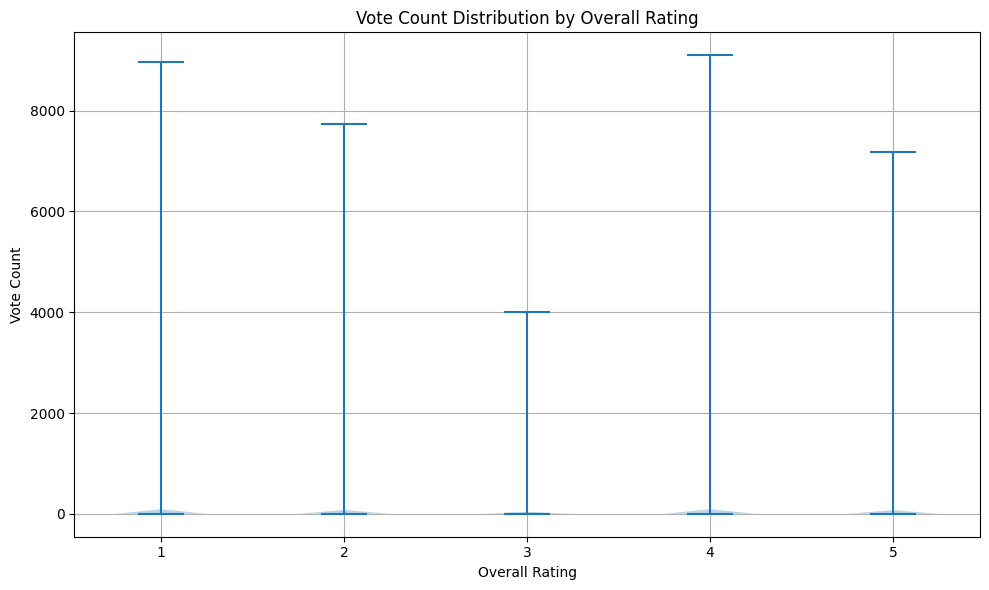

In [ ]:
# Violin plot
plt.figure(figsize=(10, 6))
plt.violinplot([df_review_merged.loc[df_review_merged['overall'] == i, 'vote'] for i in range(1, 6)], positions=[1, 2, 3, 4, 5])
plt.title('Vote Count Distribution by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Vote Count')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(True)
plt.tight_layout()

plt.show()


review image and votes

In [ ]:
df_review_merged = pd.read_csv('df_review_merged.csv')
df_review_merged.info()

C:\Users\rzp98\AppData\Local\Temp\ipykernel_5760\3956128325.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_review_merged = pd.read_csv('df_review_merged.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20566364 entries, 0 to 20566363
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   overall     float64
 1   verified    bool   
 2   reviewTime  object 
 3   asin        object 
 4   reviewText  object 
 5   vote        object 
 6   image       bool   
 7   price       float64
 8   main_cat    object 
 9   Year        int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 1.3+ GB


In [ ]:

df_review_merged['vote'] = df_review_merged['vote'].str.replace(',', '').astype(float)


In [ ]:
df_review_merged['vote'].isna().sum()

0

In [ ]:
df_review_merged = df_review_merged.dropna(subset=['vote'])

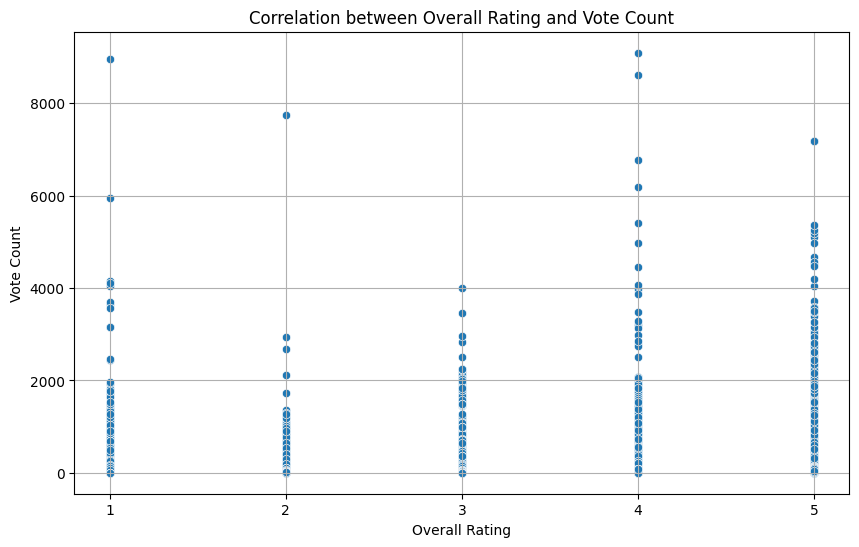

0.019782066960203546

In [ ]:
correlation = df_review_merged['overall'].corr(df_review_merged['vote'])

# Visualize the correlation
plt.figure(figsize=(10, 6))
plt.xticks([1, 2, 3, 4, 5])
sns.scatterplot(x='overall', y='vote', data=df_review_merged)
plt.title('Correlation between Overall Rating and Vote Count')
plt.xlabel('Overall Rating')
plt.ylabel('Vote Count')
plt.grid(True)
plt.show()

correlation

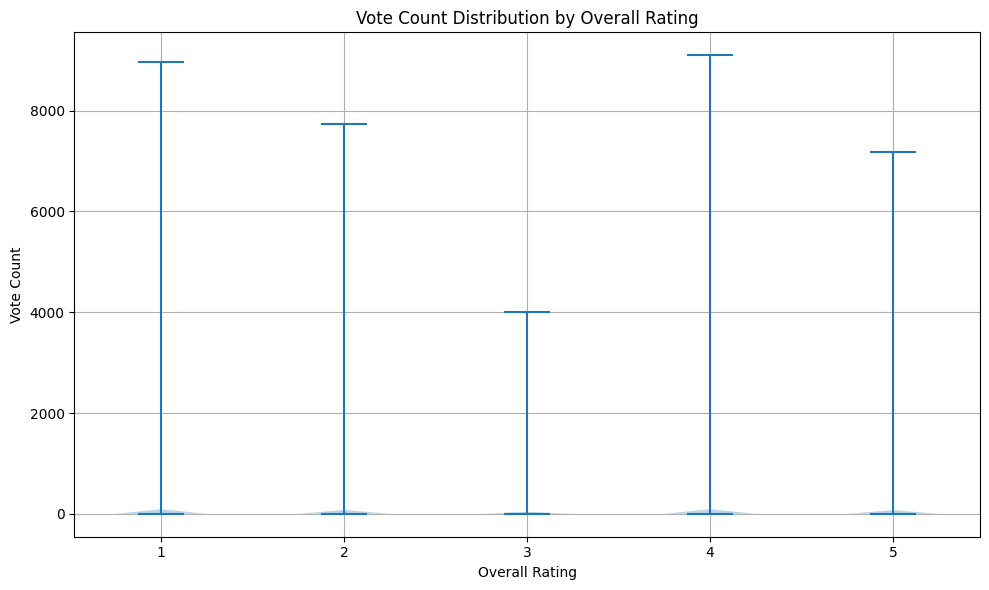

In [ ]:
# Violin plot
plt.figure(figsize=(10, 6))
plt.violinplot([df_review_merged.loc[df_review_merged['overall'] == i, 'vote'] for i in range(1, 6)], positions=[1, 2, 3, 4, 5])
plt.title('Vote Count Distribution by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Vote Count')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(True)
plt.tight_layout()

plt.show()


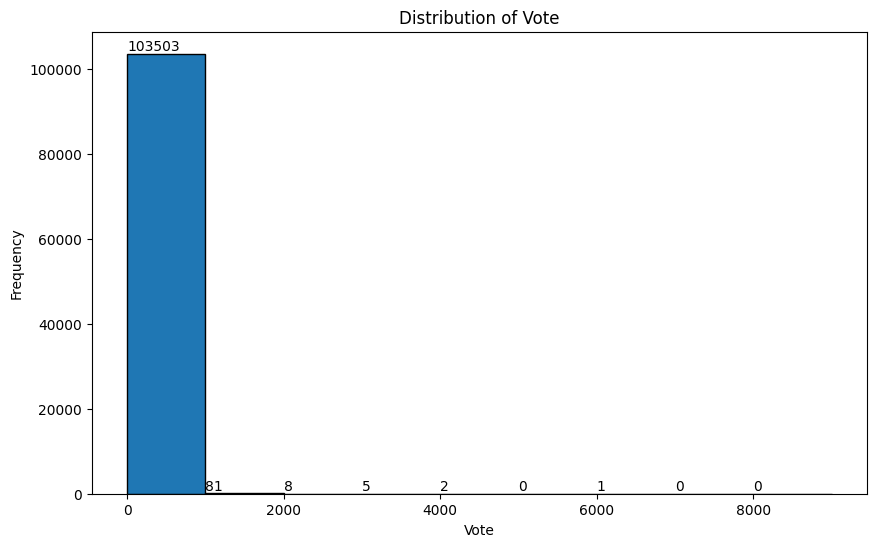

In [ ]:
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df_image_true['vote'],bins=range(1, 10000, 1000), edgecolor='black')

for count, bin in zip(counts, bins):
    plt.text(bin, count, str(int(count)), rotation=0, va='bottom')

# Set the labels and title
plt.xlabel('Vote')
plt.ylabel('Frequency')
plt.title('Distribution of Vote')

# Show the plot
plt.show()

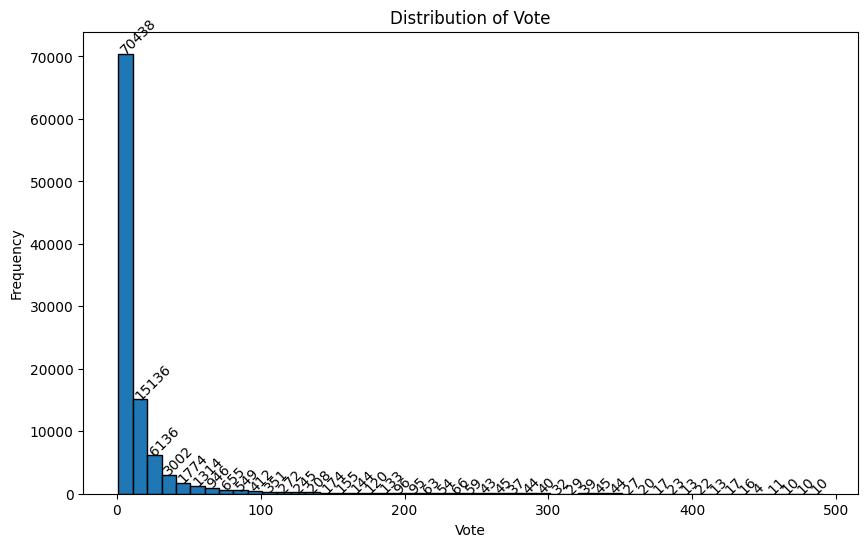

In [ ]:
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df_image_true['vote'],bins=range(1, 500, 10), edgecolor='black')

for count, bin in zip(counts, bins):
    plt.text(bin, count, str(int(count)), rotation=45)

# Set the labels and title
plt.xlabel('Vote')
plt.ylabel('Frequency')
plt.title('Distribution of Vote')

# Show the plot
plt.show()

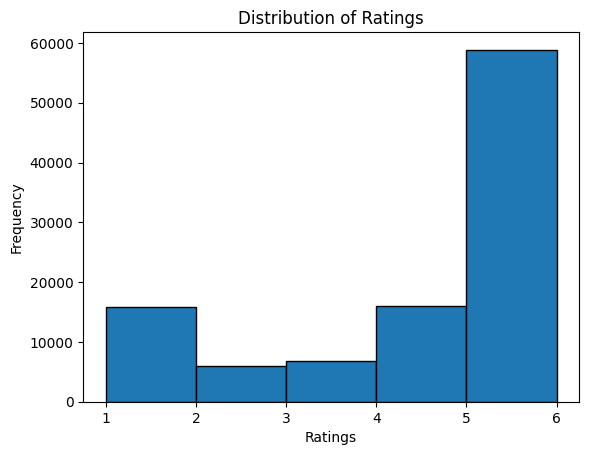

In [ ]:
plt.hist(df_image_true['overall'], bins=range(1, 7), edgecolor='black')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

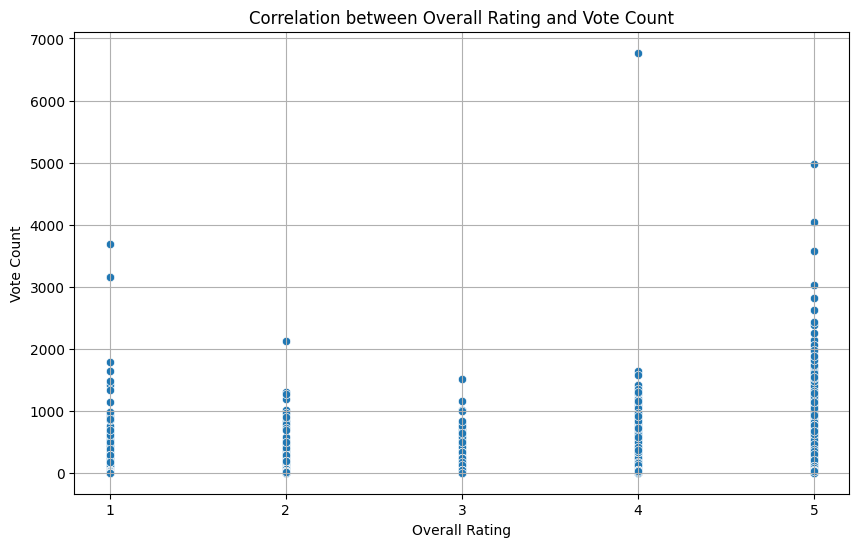

0.01474654730582192

In [ ]:
correlation = df_image_true['overall'].corr(df_image_true['vote'])

# Visualize the correlation
plt.figure(figsize=(10, 6))
plt.xticks([1, 2, 3, 4, 5])
sns.scatterplot(x='overall', y='vote', data=df_image_true)
plt.title('Correlation between Overall Rating and Vote Count')
plt.xlabel('Overall Rating')
plt.ylabel('Vote Count')
plt.grid(True)
plt.show()

correlation

In [ ]:
m, b = np.polyfit(df_image_true['overall'], df_image_true['vote'], 1)
m

0.7500423132425983

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


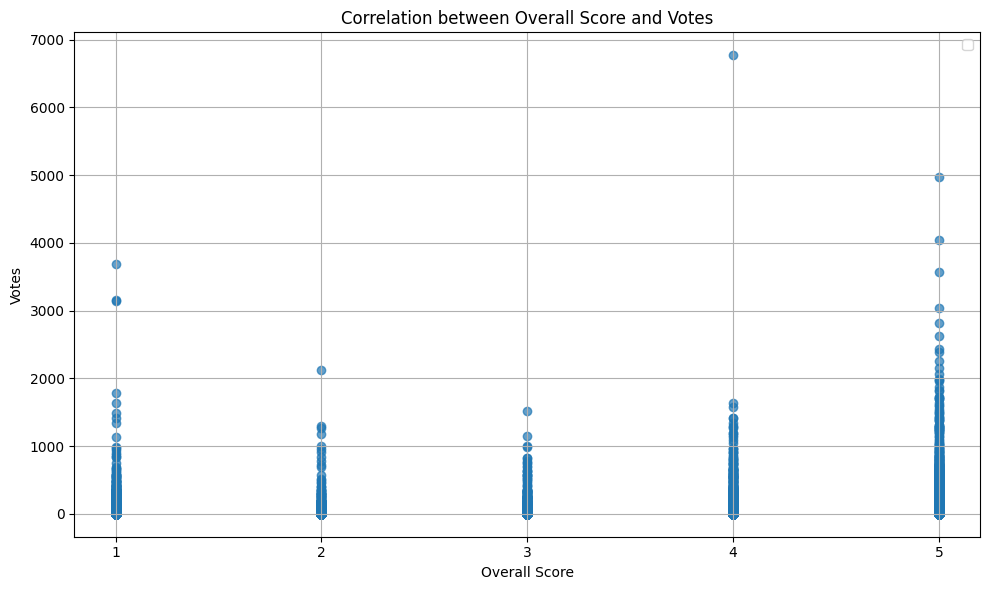

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.xticks([1, 2, 3, 4, 5])
plt.scatter(df_image_true['overall'], df_image_true['vote'], alpha=0.7)

plt.title('Correlation between Overall Score and Votes')
plt.xlabel('Overall Score')
plt.ylabel('Votes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_image_true['vote'].value_counts()

vote
2.0       19119
3.0       13387
4.0        9744
5.0        7475
6.0        5909
          ...  
544.0         1
731.0         1
493.0         1
392.0         1
1542.0        1
Name: count, Length: 749, dtype: int64

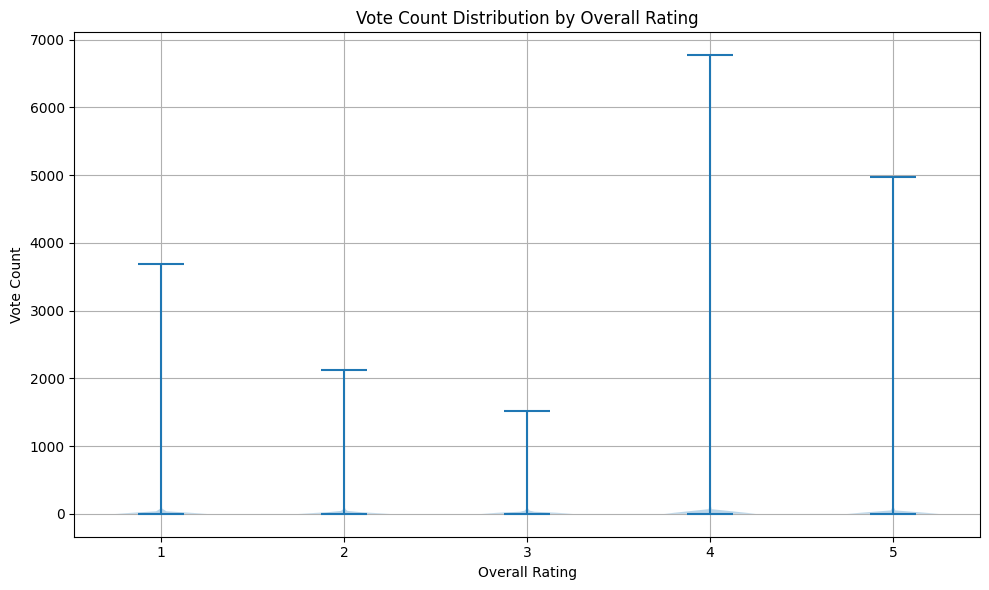

In [ ]:
# Violin plot
plt.figure(figsize=(10, 6))
plt.violinplot([df_image_true.loc[df_image_true['overall'] == i, 'vote'] for i in range(1, 6)], positions=[1, 2, 3, 4, 5])
plt.title('Vote Count Distribution by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Vote Count')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(True)
plt.tight_layout()

plt.show()


## Product dataset EDA

In [ ]:
# product的随便搞搞就行了 我们可能就一两张图给到product因为不是重点


In [ ]:
# 而且product description 没分camera 拿大的dataset分一下看看比如camera的总共占全product的多少 
# 算个数就行 plot主要还是展示一些其他的

In [ ]:
# 拿我们选的camera或者phone或者comoputer， 被product dataset leftjoin 过来brand
# 再做个brand 的distribution应该就够了，展示top 几数量的brand